In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt    
from matplotlib import animation, rc
import sklearn
from sklearn.preprocessing import LabelEncoder
import statistics as stat
from scipy.stats import pearsonr
from sklearn.datasets import load_boston
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import catboost as cb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('CreditCard_train.csv')

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
df_column_label=df.iloc[:1,:].rename(columns={'Unnamed: 0':''}).set_index('').T
df_column_label

,ID
X1,LIMIT_BAL
X2,SEX
X3,EDUCATION
X4,MARRIAGE
X5,AGE
X6,PAY_0
X7,PAY_2
X8,PAY_3
X9,PAY_4
X10,PAY_5


In [5]:
df=df.drop([0])
df.drop(df.columns[0],axis=1,inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 1 to 24000
Data columns (total 24 columns):
X1     24000 non-null object
X2     24000 non-null object
X3     24000 non-null object
X4     24000 non-null object
X5     24000 non-null object
X6     24000 non-null object
X7     24000 non-null object
X8     24000 non-null object
X9     24000 non-null object
X10    24000 non-null object
X11    24000 non-null object
X12    24000 non-null object
X13    24000 non-null object
X14    24000 non-null object
X15    24000 non-null object
X16    24000 non-null object
X17    24000 non-null object
X18    24000 non-null object
X19    24000 non-null object
X20    24000 non-null object
X21    24000 non-null object
X22    24000 non-null object
X23    24000 non-null object
Y      24000 non-null object
dtypes: object(24)
memory usage: 4.6+ MB


In [7]:
df = df.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 1 to 24000
Data columns (total 24 columns):
X1     24000 non-null int64
X2     24000 non-null int64
X3     24000 non-null int64
X4     24000 non-null int64
X5     24000 non-null int64
X6     24000 non-null int64
X7     24000 non-null int64
X8     24000 non-null int64
X9     24000 non-null int64
X10    24000 non-null int64
X11    24000 non-null int64
X12    24000 non-null int64
X13    24000 non-null int64
X14    24000 non-null int64
X15    24000 non-null int64
X16    24000 non-null int64
X17    24000 non-null int64
X18    24000 non-null int64
X19    24000 non-null int64
X20    24000 non-null int64
X21    24000 non-null int64
X22    24000 non-null int64
X23    24000 non-null int64
Y      24000 non-null int64
dtypes: int64(24)
memory usage: 4.6 MB


In [8]:
#gather simple stats info on the whole dataset:
df.iloc[:,:-1].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,24000.0,165495.986667,129128.744855,10000.0,50000.00,140000.0,240000.00,1000000.0
X2,24000.0,1.628250,0.483282,1.0,1.00,2.0,2.00,2.0
X3,24000.0,1.847417,0.780007,0.0,1.00,2.0,2.00,6.0
X4,24000.0,1.557250,0.522080,0.0,1.00,2.0,2.00,3.0
X5,24000.0,35.380458,9.271050,21.0,28.00,34.0,41.00,79.0
X6,24000.0,-0.003125,1.123425,-2.0,-1.00,0.0,0.00,8.0
X7,24000.0,-0.123500,1.200580,-2.0,-1.00,0.0,0.00,8.0
X8,24000.0,-0.154750,1.204033,-2.0,-1.00,0.0,0.00,8.0
X9,24000.0,-0.211667,1.166549,-2.0,-1.00,0.0,0.00,8.0
X10,24000.0,-0.252917,1.136993,-2.0,-1.00,0.0,0.00,8.0


In [9]:
#From the above stats table, abnormal values are spotted,
#min values in X3, X4 are both 0, which is not categorised, according to data description sheet provided
#a further investigation reveals all possible values:
x3_val, x4_val=df['X3'].value_counts(), df['X4'].value_counts()
print(x3_val,'\n', x4_val)
#there are category type '0','5','6' for feature column X3--'Education', that are undefined in description
#the category type '0' is not specified in description for feature column X4--'Marital status'

2    11360
1     8443
3     3850
5      207
4       92
6       37
0       11
Name: X3, dtype: int64 
 2    12877
1    10813
3      269
0       41
Name: X4, dtype: int64


In [10]:
#to stricly follow the data categorisation description,
#a decision is made to categorise all unknown types into type 'others'
#correct the X3 'Education' column: all '0','5','6' go into '4'
df['X3']=df['X3'].apply(lambda val:val if val in [1,2,3,4] else 4)    #reallocate all unknown types to '4'
print(df['X3'].value_counts())     #check the corrected column
#correct the X4 column:
df['X4']=df['X4'].apply(lambda val:val if val in [1,2,3] else 3)   #reallocate all unknwon to '3'
print(df['X4'].value_counts())     #check if correction works

2    11360
1     8443
3     3850
4      347
Name: X3, dtype: int64
2    12877
1    10813
3      310
Name: X4, dtype: int64


There are 18630 non-default cases (clase 0), 5370 default cases (class 1)


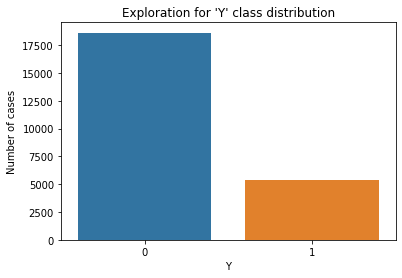

In [11]:
#now explore the data, first by visualising the 'Y' column outcome distribution 
class_0_num,class_1_num=df[df['Y']==0]['Y'].count(), df[df['Y']==1]['Y'].count()
print('There are {0} non-default cases (clase 0), {1} default cases (class 1)'.format(class_0_num,class_1_num))
fig, axis=plt.subplots()
sns.countplot(data=df, x='Y', order = df['Y'].value_counts().index)
axis.set_ylabel('Number of cases', rotation=90, labelpad=5)
plt.title("Exploration for 'Y' class distribution")
plt.show()

In [12]:
#initial feature engineering
#log transform

#apply log(x+1) element-wise to a subset of columns
to_log = ['X18','X19','X20','X21','X22','X23']
df_log = df[to_log].applymap(lambda x: np.log(x+1))

#rename columns
df_log.columns = 'log_' + df_log.columns

#shift the index
df_log.index = df_log.index + 1

In [13]:
df3=df.drop(['X12', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23'], axis=1)
df3=pd.concat([df3, df_log], axis=1)

In [14]:
#perform outlier analysis
from sklearn.cluster import DBSCAN
df3=df3.dropna()
outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(df3)
list(clusters).count(-1)

23821

In [15]:
#get all features for default case
df1=df[df['Y']==1].drop(columns=['Y'])
#get all features for non-default case
df0=df[df['Y']==0].drop(columns=['Y'])
#some simple pandas statistics for each cases:
#for class '1' default
dfstat1=df1.describe().drop(['count'])
dfstat1.T
#for class '0' non-default
dfstat0=df0.describe().drop(['count'])
dfstat0.T

,mean,std,min,25%,50%,75%,max
X1,175806.548578,131059.406691,10000.0,60000.00,150000.0,250000.00,1000000.0
X2,1.638486,0.480452,1.0,1.00,2.0,2.00,2.0
X3,1.824369,0.746647,1.0,1.00,2.0,2.00,4.0
X4,1.570692,0.520161,1.0,1.00,2.0,2.00,3.0
X5,35.339989,9.145857,21.0,28.00,34.0,41.00,79.0
X6,-0.197155,0.951699,-2.0,-1.00,0.0,0.00,8.0
X7,-0.290660,1.038294,-2.0,-1.00,0.0,0.00,8.0
X8,-0.304616,1.054434,-2.0,-1.00,0.0,0.00,8.0
X9,-0.344498,1.013490,-2.0,-1.00,0.0,0.00,8.0
X10,-0.377831,0.981919,-2.0,-1.00,0.0,0.00,7.0


In [12]:
#next use pandas's plotting tools to help visualise all the data, for class '1' first

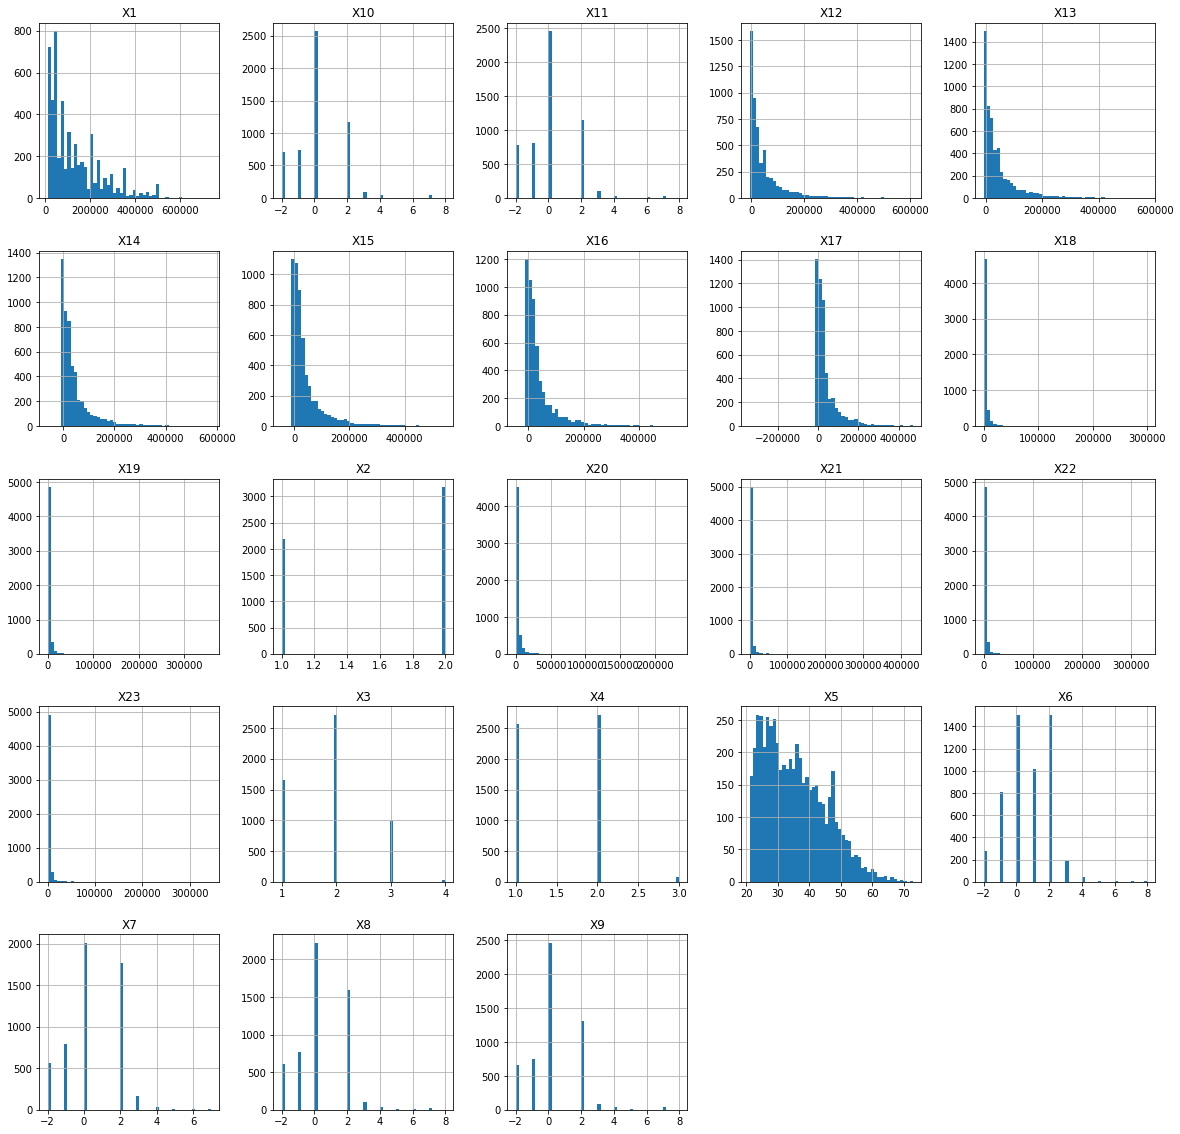

In [13]:
#use pandas.Dataframe's histogram to visualise the value distribution for each column of feature on a histogram
df1.hist(bins=50,figsize=(20,20))
plt.show()

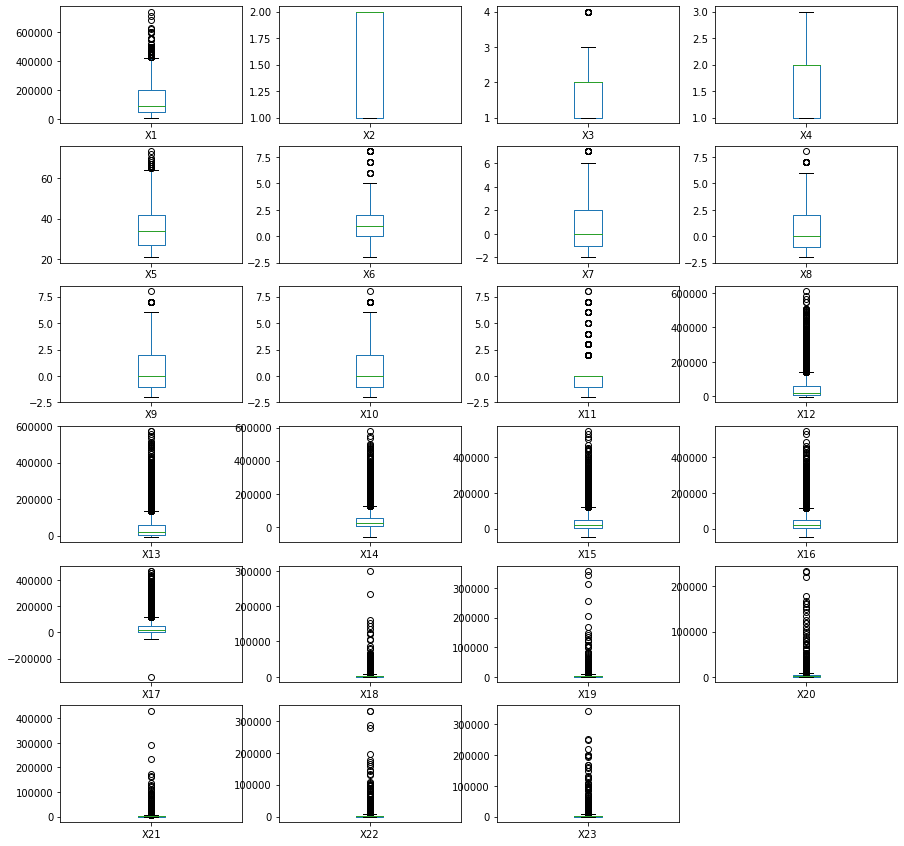

In [67]:
#can use pandas's boxplot to create a box-and-whisker plot, which is used to viusalise numerical data through their quartiles
df1.plot(kind='box', subplots=True, layout=(6,4), sharex=False, sharey=False, figsize=(15,15))
plt.show()

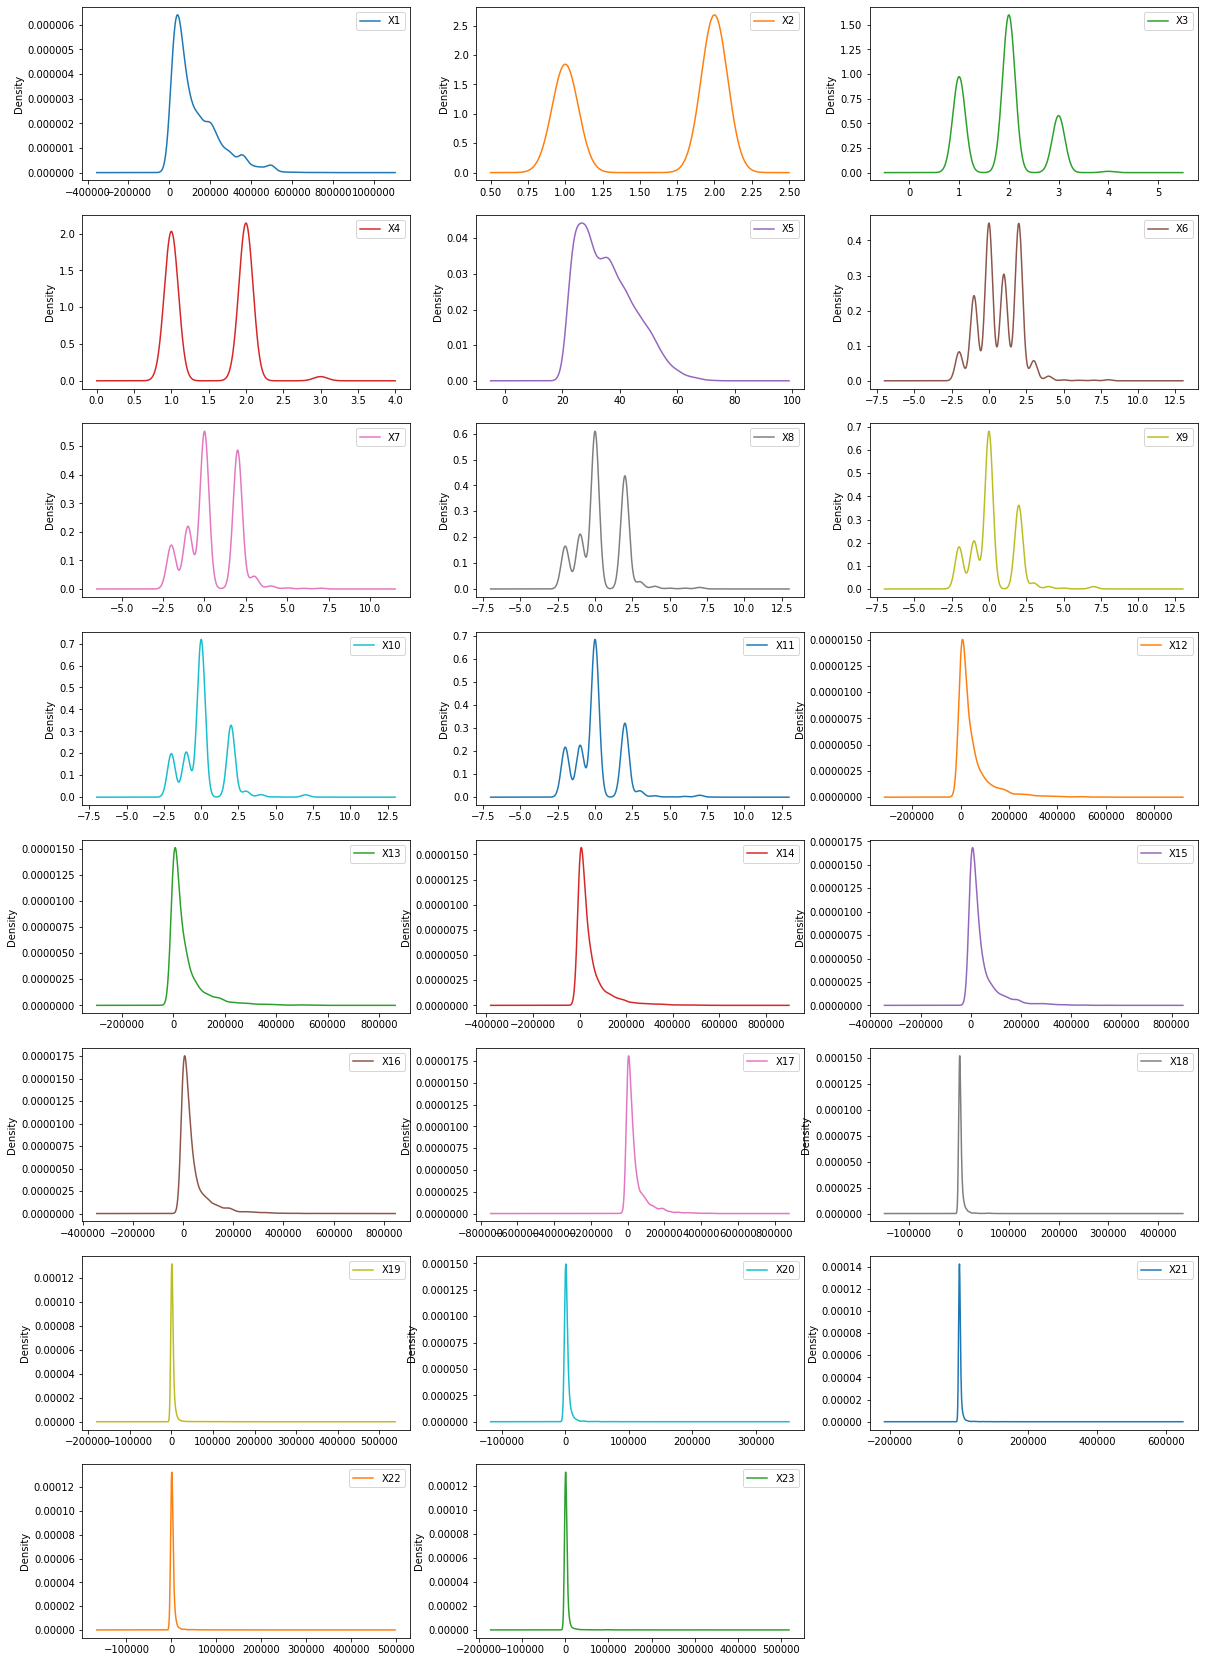

In [68]:
#use density plots, the kernel density estimation
df1.plot(kind='density', subplots=True, layout=(8,3), sharex=False, sharey=False, figsize=(20,30))
plt.show()

In [13]:
#similarly plot for class '0'

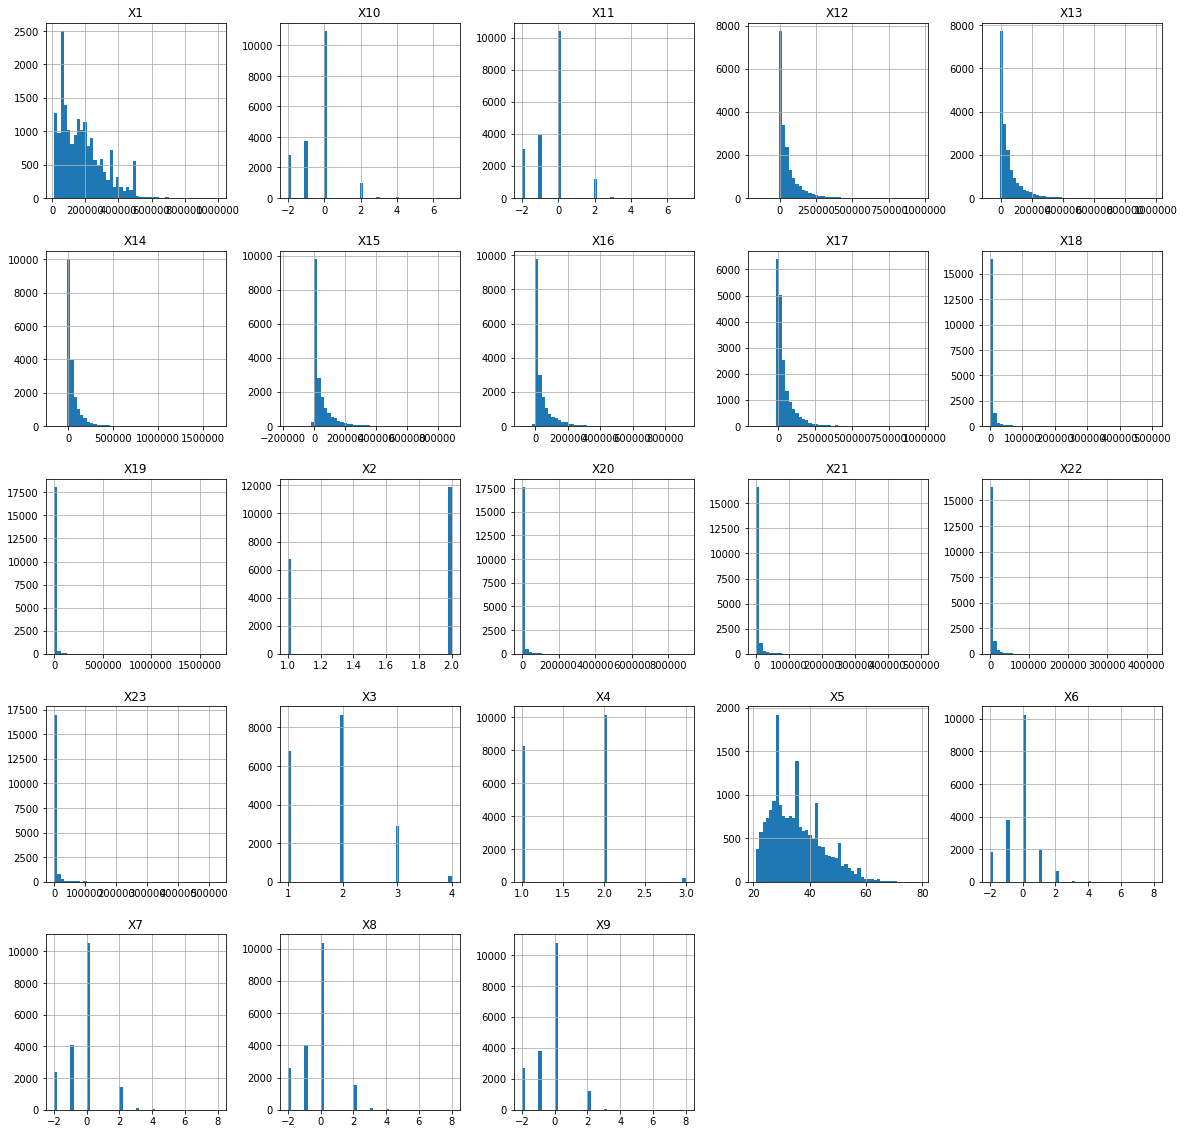

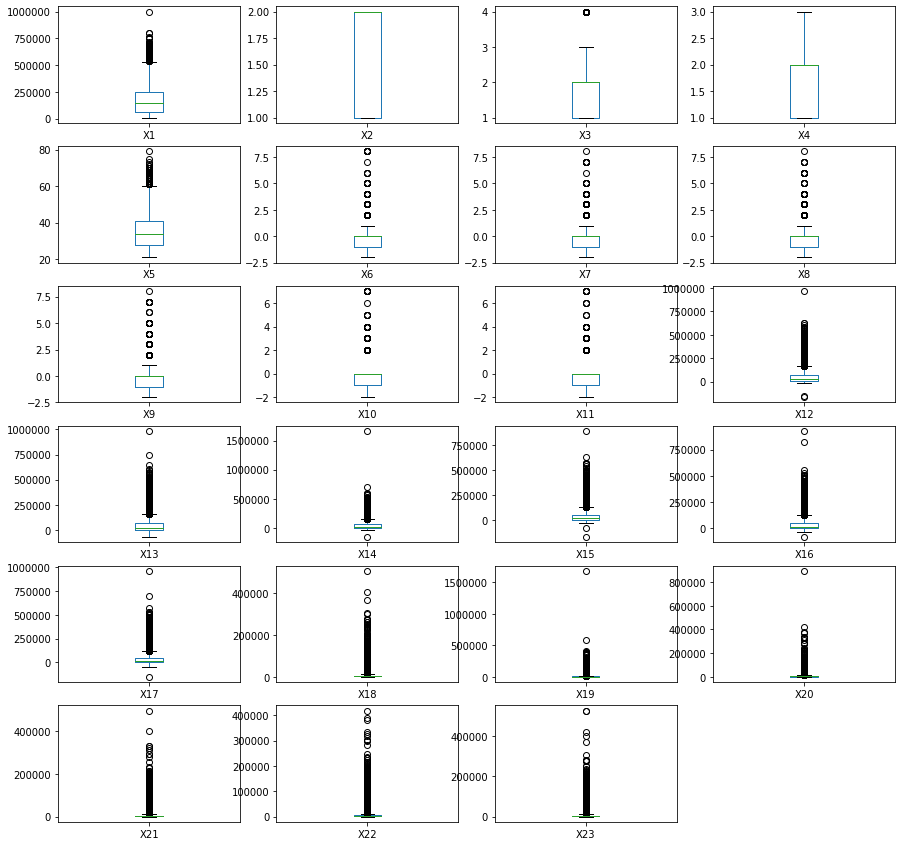

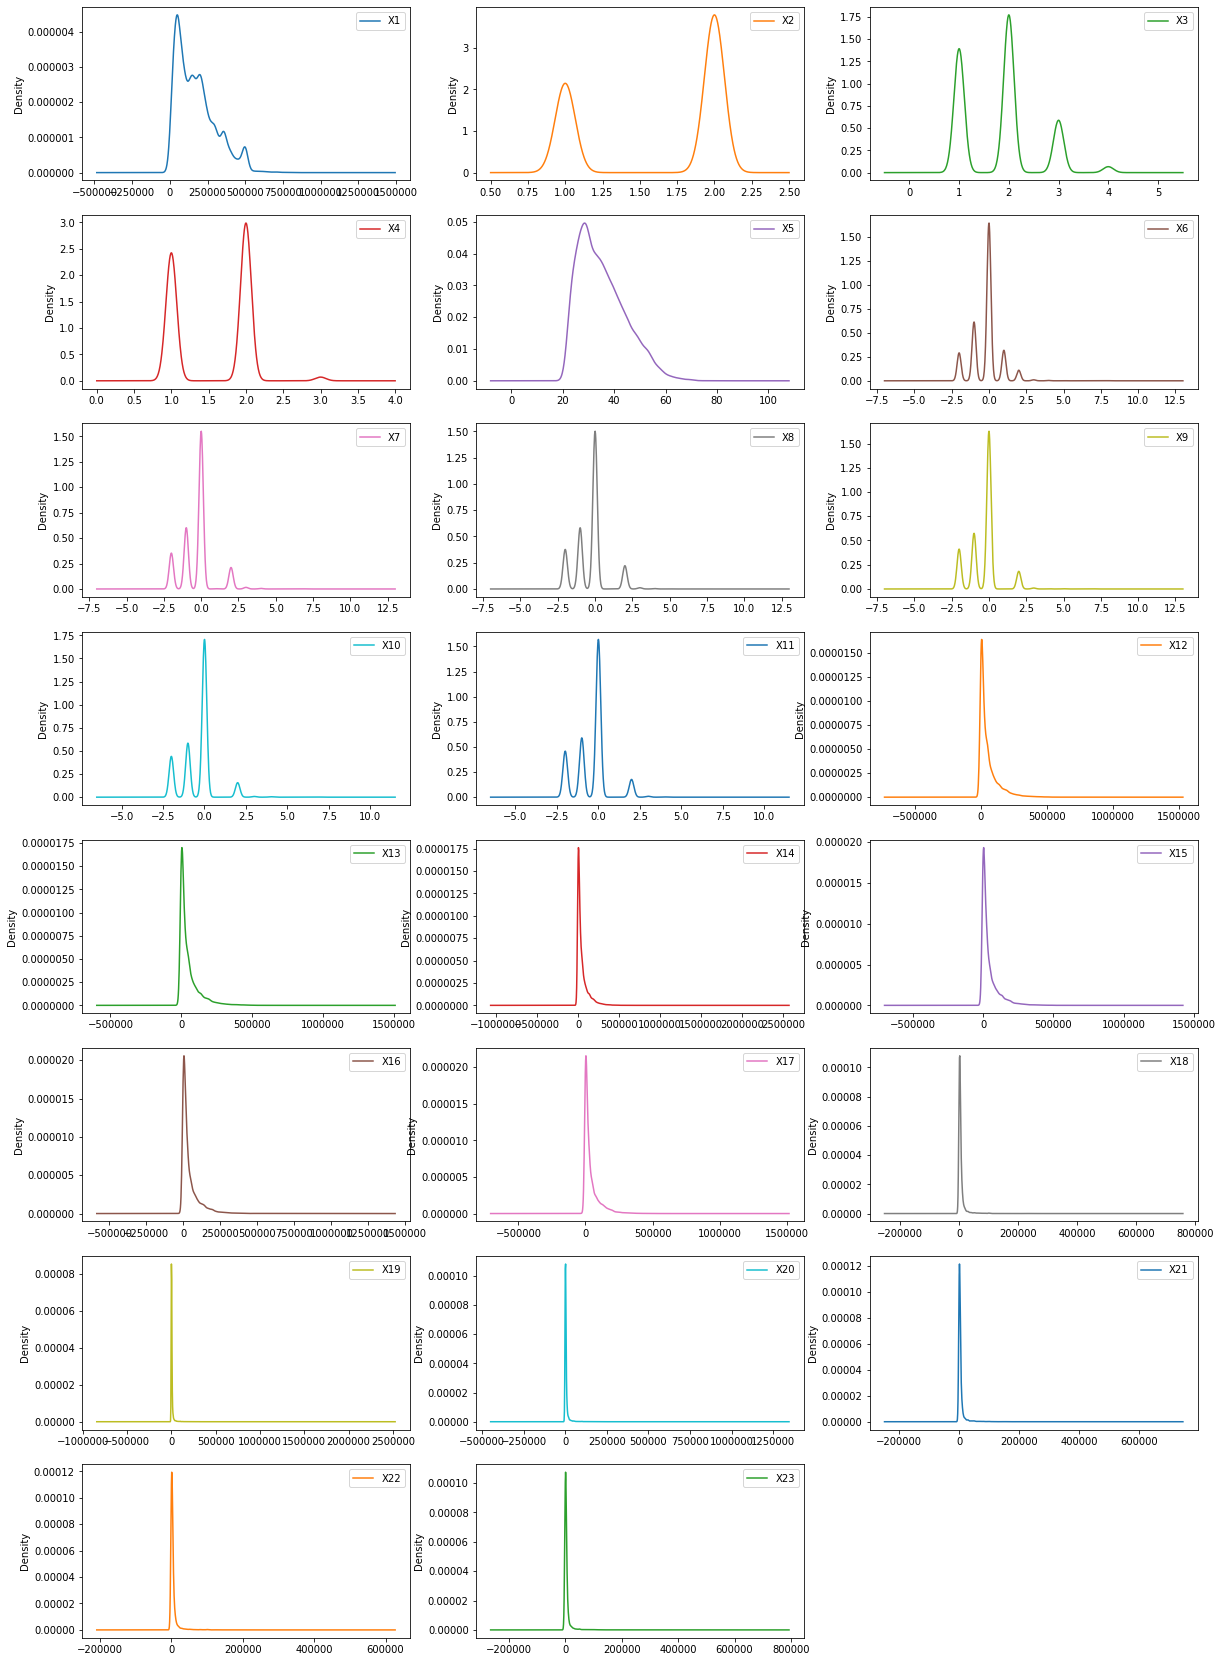

In [14]:
df0.hist(bins=50,figsize=(20,20))
df0.plot(kind='box', subplots=True, layout=(6,4), sharex=False, sharey=False, figsize=(15,15))
df0.plot(kind='density', subplots=True, layout=(8,3), sharex=False, sharey=False, figsize=(20,30))
plt.show()

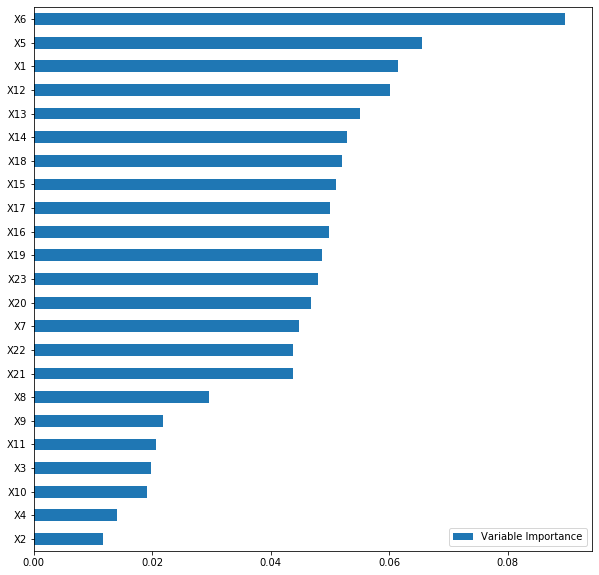

In [12]:
#get feature importance ranking from Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_train_val_X=df.iloc[:,:-1]  # this would be the train/validation combined set before splitting
rf_train_val_y=df.iloc[:,-1]
rf_train_X, rf_val_X, rf_train_y, rf_val_y = train_test_split(rf_train_val_X, rf_train_val_y, test_size=0.25, random_state = 1)
#use standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rf_train_X = scaler.fit_transform(rf_train_X)
rf_val_X = scaler.transform(rf_val_X)
#initiate the random forest classifier
rf = RandomForestClassifier() 
#fit the model on training data.
rf.fit(rf_train_X, rf_train_y) 
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = rf_train_val_X.columns,
                                   columns=['Variable Importance']).sort_values('Variable Importance',ascending=True)
feature_importance.plot.barh(figsize=(10,10))

In [16]:
#from above, the X6 column--'the repayment status in September, 2005' occupies the highest importance, according to RandomForest
#this makes sense as X6 is the repayment status just one month prior

In [16]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from minepy import MINE
import missingno as msno

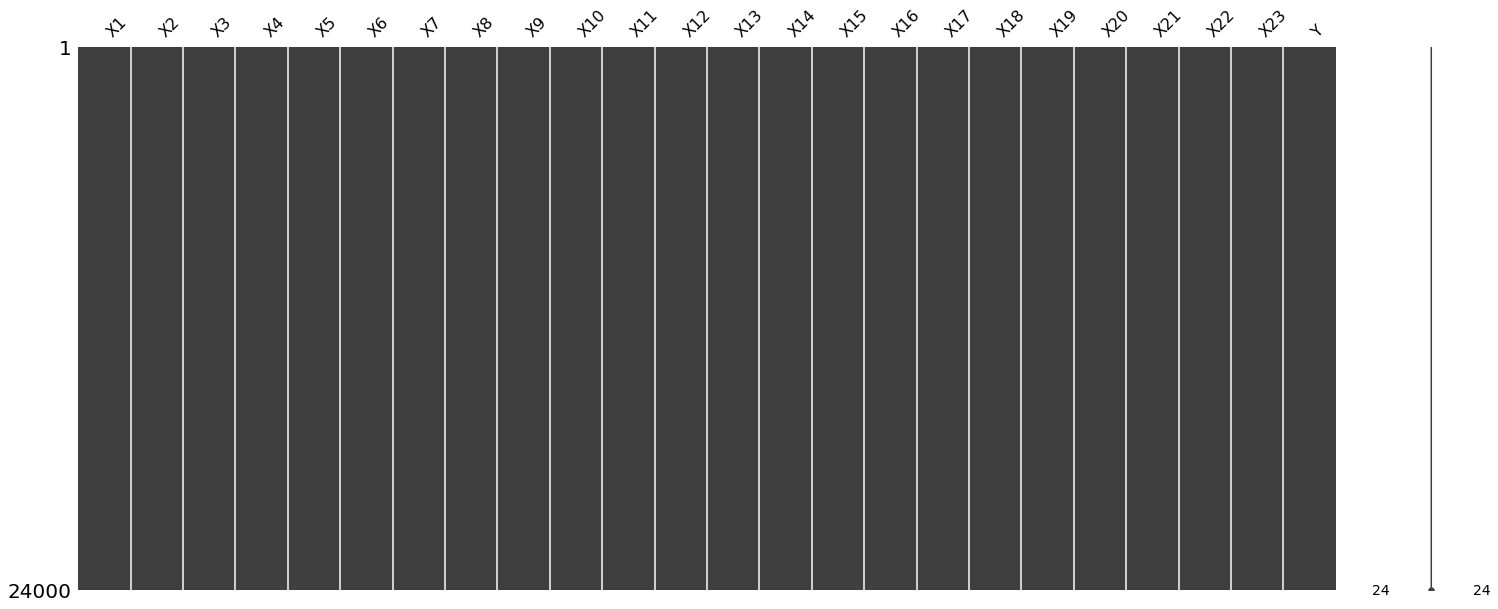

In [17]:
msno.matrix(df)

In [17]:
# use logistic regression to pre-train the model and test the result for a first glance
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
df.dropna(axis=0, subset=['Y'], inplace=True)
y = df.Y
X = df.drop(['Y'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state = 1)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [19]:
logreg = LogisticRegression()   #by default is 'lbfgs'
logreg.fit(train_X, train_y)
y_pred = logreg.predict(test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_X, test_y)))

Accuracy of logistic regression classifier on test set: 0.80


In [20]:
# Features Selection

In [21]:
def get_rank(df_X, df_Y):
    
    def rank_to_dict(ranks, names, order=1):
        minmax = MinMaxScaler()
        ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
        ranks = map(lambda x: round(x, 2), ranks)
        return dict(zip(names, ranks ))

    Y = df_Y.values
    X = df_X.values 
    names = list(df_X)

    ranks = {}

    lr = LinearRegression(normalize=True)
    lr.fit(X, Y)
    ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)

    ridge = Ridge(alpha=7)
    ridge.fit(X, Y)
    ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)

    lasso = Lasso(alpha=.05)
    lasso.fit(X, Y)
    ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)

    rfe = RFE(lr)
    rfe.fit(X,Y)
    ranks["RFE"] = rank_to_dict(rfe.ranking_, names, order=-1)

    rf = RandomForestRegressor(n_estimators = 10)
    rf.fit(X,Y)
    ranks["RF"] = rank_to_dict(rf.feature_importances_, names)

    f, pval  = f_regression(X, Y, center=True)
    ranks["Corr."] = rank_to_dict(f, names)

    mine = MINE()
    mic_scores = []
    for i in range(X.shape[1]):
        mine.compute_score(X[:,i], Y)
        m = mine.mic()
        mic_scores.append(m)

    ranks["MIC"] = rank_to_dict(mic_scores, names)

    r = {}
    for name in names:
        r[name] = round(np.mean([ranks[method][name] 
                                 for method in ranks.keys()]), 2)
    methods = sorted(ranks.keys())
    ranks["Mean"] = r
    methods.append("Mean")

    return ranks

def get_top_features(df_X,n,ranks):
    ranks['Mean'] = {key:val for key, val in ranks['Mean'].items() if key in list(df_X)}
    sorted_rank = sorted(ranks['Mean'].items(), key=lambda kv: kv[1], reverse=True)
    mean_ranking = [item[0] for item in sorted_rank]
    kept_features = mean_ranking[:n]
    removed_features = [x for x in mean_ranking if x not in kept_features]
    for i in removed_features:
        del df_X[i]
    return kept_features, removed_features

def get_features_threshold(df_X,n,ranks):
    ranks['Mean'] = {key:val for key, val in ranks['Mean'].items() if key in list(df_X)}
    all_features = list(df_X)
    kept_features = []
    for key, val in ranks['Mean'].items():
        if val > n:
            kept_features.append(key)
    removed_features = [x for x in all_features if x not in kept_features]
    for i in removed_features:
        del df_X[i]
    return kept_features, removed_features

def del_highly_correlated(df_X, threshold, ranks):
    kept_features = []
    removed_features = set() # Set of all the names of deleted columns
    corr_matrix = df_X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold):
                colnamei = corr_matrix.columns[i] # getting the name of column
                colnamej = corr_matrix.columns[j] # getting the name of column
                if (corr_matrix.columns[j] not in removed_features) and (ranks['Mean'][colnamei]<ranks['Mean'][colnamej]):
                    removed_features.add(colnamei)
                if (corr_matrix.columns[i] not in removed_features) and (ranks['Mean'][colnamej]<ranks['Mean'][colnamei]):
                    removed_features.add(colnamej)
    kept_features = [x for x in list(df_X) if x not in list(removed_features)]
    for i in removed_features:
        del df_X[i]
    return kept_features, list(removed_features)

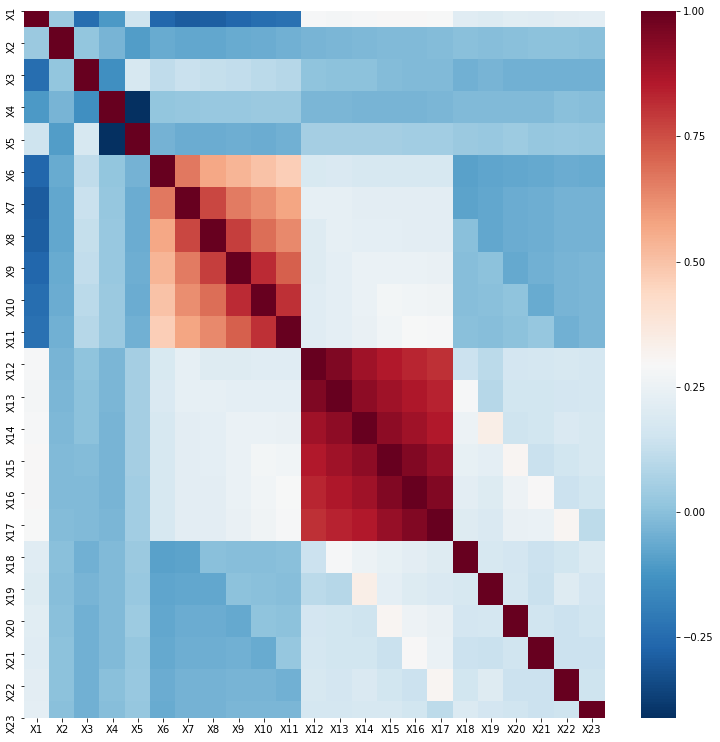

In [22]:
df_test = df.sample(n=500)

df = pd.merge(df,df_test, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

df_X = df.drop(['Y'], axis=1)
df_Y = df['Y']
df_X_test = df_test.drop(['Y'], axis=1)
df_Y_test = df_test['Y']

correlations = df_X.corr()
fig, ax = plt.subplots(figsize=(13,13)) 
sns.heatmap(correlations, xticklabels=correlations.columns,yticklabels=correlations.columns,cmap = "RdBu_r")

In [23]:
# red block represent high rate of correlation
#therefore X12-X17 features have high correlations, and X6-X11 have medium correlations
#try: delete features that correlated rate higher than 0.8

In [73]:
ranks= get_rank(df_X, df_Y)
selected_features, removed_features = del_highly_correlated(df_X,0.8,ranks)
print(removed_features)
print(selected_features)

['X13', 'X16', 'X15', 'X14', 'X11', 'X17', 'X9']
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X10', 'X12', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


In [19]:
#take two minutes to run

In [57]:
df2=df.drop(['X9','X11','X13','X14','X15','X16','X17'], axis=1)

In [58]:
df2.dropna(axis=0, subset=['Y'], inplace=True)
y2 = df2.Y
X2 = df2.drop(['Y'], axis=1)
train_X2, test_X2, train_y2, test_y2 = train_test_split(X2, y2, test_size=0.25, random_state = 1)
# set random state = 1 for comprison

In [61]:
train_X2 = scaler.fit_transform(train_X2)
test_X2 = scaler.transform(test_X2)

array([[ 0.27214944,  0.7701963 ,  2.93566228, ..., -0.01211455,
         8.37139485,  0.14820723],
       [-1.12701805, -1.2983703 , -1.14542523, ..., -0.29036469,
        -0.28674733, -0.18095249],
       [ 1.43812235, -1.2983703 ,  0.21493728, ..., -0.20445242,
         0.10763391, -0.2885823 ],
       ...,
       [ 1.2826593 ,  0.7701963 , -1.14542523, ..., -0.31676799,
        -0.31547664, -0.30836719],
       [-0.89382347, -1.2983703 ,  0.21493728, ..., -0.26903895,
        -0.26026463, -0.25516105],
       [-0.66062888, -1.2983703 , -1.14542523, ..., -0.22347634,
         1.04215339, -0.1611676 ]])

In [60]:
#to see the performance change (if any) after doing feature selection
logreg = LogisticRegression()
logreg.fit(train_X2, train_y2)
y_pred2 = logreg.predict(test_X2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_X2, test_y2)))

Accuracy of logistic regression classifier on test set: 0.80


In [32]:
#now formarlly start the model training and selection
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [29]:
#currently 6 models are selected for trials: lr, nb, lda, qda, lsvc (svm), and xgb
#and 5 major performance metrics are selected: accuracy score, precison score, recall score, f1score, rocauc score
#a k-fold cross validation from sklearn for all methods and computing scores for all metrics is used, with default k=5

In [36]:
#for all base setting, with standard scaler applied
X_cv=df2.iloc[:,:-1]    #split the features from target, this X and y would already be the combined train and validation set
y_cv=df2.iloc[:,-1]
#apply the standard scaler:
scaler=StandardScaler()
scaler.fit(X_cv.values)
X_cv=scaler.transform(X_cv.values)  
#define a custome function to help facilitate to obtain a performance rating across all models selected for trial
def get_cv_scores_base(model, X, y, name, n_splits=5):
    """
    Takes in a model object, X is all independent variables, y is the target, n_splits (5 by default) for cross validation,
    and name of the model
    returns a pandas dataframe with a score for each chosen metrics, for each classifier model on a cross-validation split
    """
    #create a 5 kfold, with shuffling
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    
    accuracy     = np.mean(cross_val_score(model, X, y, cv=cv, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X, y, cv=cv, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X, y, cv=cv, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X, y, cv=cv, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X, y, cv=cv, scoring='roc_auc'))
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'roc/auc'       : [rocauc]})
    return df_model

#initiate all classifiers for trial:
lr=LogisticRegression()
nb=GaussianNB()
lda=LDA()
qda=QDA()
lsvc=LinearSVC()
xgb=XGBClassifier()

df_results=pd.concat([get_cv_scores_base(model=lr, X=X_cv, y=y_cv, name='LogisticRegression'),
                      get_cv_scores_base(model=nb, X=X_cv, y=y_cv, name='Naive Bayes'),
                      get_cv_scores_base(model=lda, X=X_cv, y=y_cv, name='Linear Discriminant'),
                      get_cv_scores_base(model=qda, X=X_cv, y=y_cv, name='Quadratic Discriminant'),
                      get_cv_scores_base(model=lsvc, X=X_cv, y=y_cv, name='LinearSVC'),
                      get_cv_scores_base(model=xgb, X=X_cv, y=y_cv, name='XGBoost')],
                      axis=0).reset_index().drop(columns=['index'])
df_results

,model,accuracy,precision,recall,f1score,roc/auc
0,LogisticRegression,0.807388,0.709709,0.235176,0.353170,0.718322
1,Naive Bayes,0.613285,0.335647,0.717946,0.454944,0.731319
2,Linear Discriminant,0.808452,0.696107,0.254744,0.372802,0.714319
3,Quadratic Discriminant,0.600772,0.333731,0.745180,0.457276,0.726117
4,LinearSVC,0.799983,0.726203,0.169085,0.274770,0.715453
5,XGBoost,0.818410,0.678320,0.357279,0.467943,0.775521


In [38]:
#now that we have a performance benchmark for all methods selected, with base data (with scaling though)
#next we consider to go back to the data and retreat it for better model performances
#it is easy to spot that the base data has a very unbalanced 'Y' class distribution:
#too many '0' classes and too few '1' classes
#try if resampling of the classes could help the performance, especially in some metrics
#naturally, resampling techniques from imblearn package are considered

In [33]:
#try SMOTE (Synthetic Minority Over-sampling)
from imblearn.over_sampling import SMOTE
#first separate the data into feature and targets, and apply standard scaler:
X_cv_smote=df2.iloc[:,:-1]
y_cv_smote=df2.iloc[:,-1]
scaler=StandardScaler()
scaler.fit(X_cv_smote.values)
X_cv_smote=scaler.transform(X_cv_smote.values)  
#define a custom function to facilitate the cross validation and metric scoring for all methods
def get_cv_scores_smote(model, X, y, name, n_splits=5):
    """
    Takes in a model object, X is all independent variables, y is the target, n_splits (5 by default) for cross validation,
    and name of the model
    smotes the data and returns a pandas dataframe with a score for each chosen metrics, for each classifier model on a cross-validation split
    """
    #split the train/validation combined set X-y into training and validation set
    #train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state = 1)
    train_val_X, train_val_y=np.array(X), np.array(y)
    #create a 5 kfold, with shuffling
    cv=KFold(n_splits=n_splits, shuffle=True, random_state=1000) 
    #has to do a manual cv, first initialize the score holders
    model_acc_scores_list=[]
    model_pre_scores_list=[]
    model_rec_scores_list=[]
    model_f1_scores_list=[]
    model_roc_scores_list=[]
    #Manual Cross-Validation
    for train_ind, val_ind in cv.split(train_val_X, train_val_y):

        #assigning train and validation data
        train_X, train_y=train_val_X[train_ind], train_val_y[train_ind]
        val_X, val_y= train_val_X[val_ind], train_val_y[val_ind] 

        #smote data
        smote_X, smote_y=SMOTE(random_state=3).fit_sample(train_X,train_y)
        
        #intialize the classifier
        mod=model.fit(smote_X, smote_y) #train the model
        y_pred=mod.predict(val_X)  #model makes predictions
        
        #score the predictions from each model
        model_acc_score= accuracy_score(val_y, y_pred)
        model_pre_score= precision_score(val_y, y_pred)
        model_rec_score= recall_score(val_y, y_pred)
        model_f1_score= f1_score(val_y, y_pred)   
        model_roc_score= roc_auc_score(val_y, y_pred)
        
        #populate the score lists
        model_acc_scores_list.append(model_acc_score)
        model_pre_scores_list.append(model_pre_score)
        model_rec_scores_list.append(model_rec_score)
        model_f1_scores_list.append(model_f1_score)
        model_roc_scores_list.append(model_roc_score)
        
    accuracy     = np.mean(model_acc_scores_list)
    precision    = np.mean(model_pre_scores_list)
    recall       = np.mean(model_rec_scores_list)
    f1score      = np.mean(model_f1_scores_list)
    rocauc       = np.mean(model_roc_scores_list)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1'           : [f1score],
                             'roc/auc'      : [rocauc]})
    
    return df_model

#initiate all classifiers for trial:
lr=LogisticRegression()
nb=GaussianNB()
lda=LDA()
qda=QDA()
lsvc=LinearSVC()
xgb=XGBClassifier()
#get and compile the results:
df_results_smote=pd.concat([get_cv_scores_smote(model=lr, X=X_cv_smote, y=y_cv_smote, name='LogisticRegression'),
                      get_cv_scores_smote(model=nb, X=X_cv_smote, y=y_cv_smote, name='Naive Bayes'),
                      get_cv_scores_smote(model=lda, X=X_cv_smote, y=y_cv_smote, name='Linear Discriminant'),
                      get_cv_scores_smote(model=qda, X=X_cv_smote, y=y_cv_smote, name='Quadratic Discriminant'),
                      get_cv_scores_smote(model=lsvc, X=X_cv_smote, y=y_cv_smote, name='LinearSVC'),
                      get_cv_scores_smote(model=xgb, X=X_cv_smote, y=y_cv_smote, name='XGBoost')],
                      axis=0).reset_index().drop(columns=['index'])

df_results_smote

        
        
    

,model,accuracy,precision,recall,f1,roc/auc
0,LogisticRegression,0.680539,0.375596,0.641296,0.473485,0.666677
1,Naive Bayes,0.387293,0.254624,0.899570,0.396884,0.569359
2,Linear Discriminant,0.687263,0.380990,0.631794,0.475083,0.667631
3,Quadratic Discriminant,0.360399,0.248644,0.916796,0.391169,0.558177
4,LinearSVC,0.684455,0.378721,0.635833,0.474410,0.667268
5,XGBoost,0.788885,0.530744,0.514876,0.522090,0.691564


In [ ]:
#although drops in accuracy, a significant increase in f1 score after performing smote
#to further validate the model performances, other resampling techniques could be considered

In [34]:
#try oversampling(with data scaling)
from imblearn.over_sampling import RandomOverSampler
#first separate the data into feature and targets, and apply standard scaler:
X_cv_ovr=df2.iloc[:,:-1]
y_cv_ovr=df2.iloc[:,-1]
scaler=StandardScaler()
scaler.fit(X_cv_ovr.values)
X_cv_ovr=scaler.transform(X_cv_ovr.values) 
#define a custom function to facilitate the cross validation and metric scoring for all methods
def get_cv_scores_ovr(model, X, y, name, n_splits=5):
    """
    Takes in a model object, X is all independent variables, y is the target, n_splits (5 by default) for cross validation,
    and name of the model
    oversamples the data and returns a pandas dataframe with a score for each chosen metrics, for each classifier model on a cross-validation split
    """
    #split the train/validation combined set X-y into training and validation set
    #train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state = 1)
    train_val_X, train_val_y=np.array(X), np.array(y)
    #create a 5 kfold, with shuffling
    cv=KFold(n_splits=n_splits, shuffle=True, random_state=1000)
    #has to do a manual cv, first initialize the score holders
    model_acc_scores_list=[]
    model_pre_scores_list=[]
    model_rec_scores_list=[]
    model_f1_scores_list=[]
    model_roc_scores_list=[]
    #Manual Cross-Validation
    for train_ind, val_ind in cv.split(train_val_X, train_val_y):

        #assigning train and validation data
        train_X, train_y=train_val_X[train_ind], train_val_y[train_ind]
        val_X, val_y= train_val_X[val_ind], train_val_y[val_ind] 

        #oversample the data
        ovr_X, ovr_y=RandomOverSampler(random_state=3).fit_sample(train_X,train_y)
        
        #intialize the classifier
        mod=model.fit(ovr_X, ovr_y) #train the model
        y_pred=mod.predict(val_X)  #model makes predictions
        
        #score the predictions from each model
        model_acc_score= accuracy_score(val_y, y_pred)
        model_pre_score= precision_score(val_y, y_pred)
        model_rec_score= recall_score(val_y, y_pred)
        model_f1_score= f1_score(val_y, y_pred)   
        model_roc_score= roc_auc_score(val_y, y_pred)
        
        #populate the score lists
        model_acc_scores_list.append(model_acc_score)
        model_pre_scores_list.append(model_pre_score)
        model_rec_scores_list.append(model_rec_score)
        model_f1_scores_list.append(model_f1_score)
        model_roc_scores_list.append(model_roc_score)
        
    accuracy     = np.mean(model_acc_scores_list)
    precision    = np.mean(model_pre_scores_list)
    recall       = np.mean(model_rec_scores_list)
    f1score      = np.mean(model_f1_scores_list)
    rocauc       = np.mean(model_roc_scores_list)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1'           : [f1score],
                             'roc/auc'      : [rocauc]})
    
    return df_model

#initiate all classifiers for trial:
lr=LogisticRegression()
nb=GaussianNB()
lda=LDA()
qda=QDA()
lsvc=LinearSVC()
xgb=XGBClassifier()
#get and compile the results:
df_results_ovr=pd.concat([get_cv_scores_ovr(model=lr, X=X_cv_ovr, y=y_cv_ovr, name='LogisticRegression'),
                      get_cv_scores_ovr(model=nb, X=X_cv_ovr, y=y_cv_ovr, name='Naive Bayes'),
                      get_cv_scores_ovr(model=lda, X=X_cv_ovr, y=y_cv_ovr, name='Linear Discriminant'),
                      get_cv_scores_ovr(model=qda, X=X_cv_ovr, y=y_cv_ovr, name='Quadratic Discriminant'),
                      get_cv_scores_ovr(model=lsvc, X=X_cv_ovr, y=y_cv_ovr, name='LinearSVC'),
                      get_cv_scores_ovr(model=xgb, X=X_cv_ovr, y=y_cv_ovr, name='XGBoost')],
                      axis=0).reset_index().drop(columns=['index'])

df_results_ovr


,model,accuracy,precision,recall,f1,roc/auc
0,LogisticRegression,0.690200,0.384177,0.633225,0.477941,0.670047
1,Naive Bayes,0.408485,0.260199,0.887958,0.402322,0.578964
2,Linear Discriminant,0.697264,0.390366,0.623520,0.479866,0.671141
3,Quadratic Discriminant,0.365547,0.250017,0.915138,0.392672,0.560939
4,LinearSVC,0.694583,0.387948,0.627024,0.479005,0.670679
5,XGBoost,0.757352,0.469870,0.630642,0.538139,0.712367


In [35]:
#try undersampling (with data scaling)
from imblearn.under_sampling import RandomUnderSampler
#first separate the data into feature and targets, and apply standard scaler:
X_cv_udr=df2.iloc[:,:-1]
y_cv_udr=df2.iloc[:,-1]
scaler=StandardScaler()
scaler.fit(X_cv_udr.values)
X_cv_udr=scaler.transform(X_cv_udr.values) 
#define a custom function to facilitate the cross validation and metric scoring for all methods
def get_cv_scores_udr(model, X, y, name, n_splits=5):
    """
    Takes in a model object, X is all independent variables, y is the target, n_splits (5 by default) for cross validation,
    and name of the model
    undersamples the data and returns a pandas dataframe with a score for each chosen metrics, for each classifier model on a cross-validation split
    """
    #split the train/validation combined set X-y into training and validation set
    #train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state = 1)
    train_val_X, train_val_y=np.array(X), np.array(y)
    #create a 5 kfold, with shuffling
    cv=KFold(n_splits=n_splits, shuffle=True, random_state=1000)
    #has to do a manual cv, first initialize the score holders
    model_acc_scores_list=[]
    model_pre_scores_list=[]
    model_rec_scores_list=[]
    model_f1_scores_list=[]
    model_roc_scores_list=[]
    #Manual Cross-Validation
    for train_ind, val_ind in cv.split(train_val_X, train_val_y):

        #assigning train and validation data
        train_X, train_y=train_val_X[train_ind], train_val_y[train_ind]
        val_X, val_y= train_val_X[val_ind], train_val_y[val_ind] 

        #oversample the data
        udr_X, udr_y=RandomUnderSampler(random_state=3).fit_sample(train_X,train_y)
        
        #intialize the classifier
        mod=model.fit(udr_X, udr_y) #train the model
        y_pred=mod.predict(val_X)  #model makes predictions
        
        #score the predictions from each model
        model_acc_score= accuracy_score(val_y, y_pred)
        model_pre_score= precision_score(val_y, y_pred)
        model_rec_score= recall_score(val_y, y_pred)
        model_f1_score= f1_score(val_y, y_pred)   
        model_roc_score= roc_auc_score(val_y, y_pred)
        
        #populate the score lists
        model_acc_scores_list.append(model_acc_score)
        model_pre_scores_list.append(model_pre_score)
        model_rec_scores_list.append(model_rec_score)
        model_f1_scores_list.append(model_f1_score)
        model_roc_scores_list.append(model_roc_score)
        
    accuracy     = np.mean(model_acc_scores_list)
    precision    = np.mean(model_pre_scores_list)
    recall       = np.mean(model_rec_scores_list)
    f1score      = np.mean(model_f1_scores_list)
    rocauc       = np.mean(model_roc_scores_list)
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1'           : [f1score],
                             'roc/auc'      : [rocauc]})
    
    return df_model

#initiate all classifiers for trial:
lr=LogisticRegression()
nb=GaussianNB()
lda=LDA()
qda=QDA()
lsvc=LinearSVC()
xgb=XGBClassifier()
#get and compile the results:
df_results_udr=pd.concat([get_cv_scores_udr(model=lr, X=X_cv_udr, y=y_cv_udr, name='LogisticRegression'),
                      get_cv_scores_udr(model=nb, X=X_cv_udr, y=y_cv_udr, name='Naive Bayes'),
                      get_cv_scores_udr(model=lda, X=X_cv_udr, y=y_cv_udr, name='Linear Discriminant'),
                      get_cv_scores_udr(model=qda, X=X_cv_udr, y=y_cv_udr, name='Quadratic Discriminant'),
                      get_cv_scores_udr(model=lsvc, X=X_cv_udr, y=y_cv_udr, name='LinearSVC'),
                      get_cv_scores_udr(model=xgb, X=X_cv_udr, y=y_cv_udr, name='XGBoost')],
                      axis=0).reset_index().drop(columns=['index'])

df_results_udr


,model,accuracy,precision,recall,f1,roc/auc
0,LogisticRegression,0.690242,0.384806,0.636716,0.479355,0.671337
1,Naive Bayes,0.432741,0.266535,0.865372,0.406770,0.586568
2,Linear Discriminant,0.696966,0.390417,0.625528,0.480391,0.671696
3,Quadratic Discriminant,0.386952,0.255458,0.902363,0.397838,0.570164
4,LinearSVC,0.694540,0.388458,0.630095,0.480224,0.671759
5,XGBoost,0.757947,0.470401,0.631535,0.538946,0.713073


In [36]:
#based on the above results, the optimal model is selected based on a compromise mainly between recall score (to make sure to catch defaulters),
#and the f1score (to also take into account the precision as well that we don't to misclassify too much),
#and also the area under roc/auc curv (to make sure a good overall classification accuracy)
#we choose XGBoost as the optimal model
#but before it is put to the final test, a hyperparameter tuning is considered to refine its performance over the traning set
#the scoring metric used for this tuning is roc_auc, as it is more reflective of the overall classification performance

In [43]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
X_train_val_tune=df2.iloc[:,:-1]
y_train_val_tune=df2.iloc[:,-1]
scaler=StandardScaler()
scaler.fit(X_train_val_tune.values)
X_train_val_tune=scaler.transform(X_train_val_tune.values)
cv_tune=KFold(n_splits=2, shuffle=True, random_state=1000)
#tune the parameters of xgb
xgb=XGBClassifier()
#parameters to be tuned, two tree booster parameters are selected, as they are deemed to affect the classification accuracy and overfitting the most.
eta=[0.05,0.1,0.15,0.2,0.25]    #or learning rate, this controls the feature weight shirnkage, to prevent overfiting, has a range from 0 to 1
max_depth=[1,3,5,7,9] #this controls the depth of each tree wehn tree boosters (for classification) are used
#however an increase in max_depth will make the model more likely to overfit, and also severely increase computational burden, normally choose from 1-10
paras_to_tune={'eta':eta,'max_depth':max_depth}
gs=GridSearchCV(estimator=xgb,
                param_grid=paras_to_tune,
                scoring='roc_auc',
                cv=cv_tune)
gs.fit(X_train_val_tune,y_train_val_tune)
print("Best roc score:", gs.best_score_)
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(paras_to_tune.keys()):
    print("the parameter {0} is optimal at {1}".format(param_name, best_parameters[param_name]))



Best roc score: 0.774155864658769
the parameter eta is optimal at 0.05
the parameter max_depth is optimal at 3


In [44]:
#next we use the trained xgb model with tuned parameter on the final test set

In [46]:
#import the test data set
df_test=pd.read_csv('CreditCard_test.csv')

In [47]:
#change index and clean up the dataframe
df_test=df_test.drop(index=[0],axis=0).rename(columns={'Unnamed: 0':''}).set_index('')
df_test

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
,,,,,,,,,,,,,,,,,,,,,
24001,50000,1,2,2,23,2,2,0,0,0,...,44116,21247,20066,8,2401,2254,2004,704,707,0
24002,60000,1,2,2,26,0,0,0,0,0,...,55736,26958,28847,2282,2324,2049,2000,3000,1120,1
24003,400000,1,2,2,27,0,0,0,0,0,...,10745,20737,9545,2501,10009,1437,1105,510,959,0
24004,20000,1,5,2,27,5,4,3,2,2,...,19709,20113,19840,0,0,0,900,0,0,0
24005,50000,1,3,2,27,0,0,-2,-2,-1,...,0,70,120,0,100,0,70,200,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [48]:
df_test=df_test.astype('int64')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 24001 to 30000
Data columns (total 24 columns):
X1     6000 non-null int64
X2     6000 non-null int64
X3     6000 non-null int64
X4     6000 non-null int64
X5     6000 non-null int64
X6     6000 non-null int64
X7     6000 non-null int64
X8     6000 non-null int64
X9     6000 non-null int64
X10    6000 non-null int64
X11    6000 non-null int64
X12    6000 non-null int64
X13    6000 non-null int64
X14    6000 non-null int64
X15    6000 non-null int64
X16    6000 non-null int64
X17    6000 non-null int64
X18    6000 non-null int64
X19    6000 non-null int64
X20    6000 non-null int64
X21    6000 non-null int64
X22    6000 non-null int64
X23    6000 non-null int64
Y      6000 non-null int64
dtypes: int64(24)
memory usage: 1.1+ MB


In [78]:
#separate the test set into feature and target
X_test_f=df_test.iloc[:,:-1].drop(columns=['X13', 'X16', 'X15', 'X14', 'X11', 'X17', 'X9']).values
y_test_f=df_test.iloc[:,-1].values     #convert to np arrays to conform with xgb classifier
#use the trained and tuned model to predict:
y_pred_f=gs.predict(X_test_f)

#list the final results
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
print('-------------------------------------------------------------------------------------------------')
print('Accuracy Score for Optimized xgb: {}'.format(accuracy_score(y_test_f, y_pred_f)))
print('Precision Score for Optimized xgb: {}'.format(precision_score(y_test_f, y_pred_f)))
print('Recall Score for Optimized xgb: {}'.format(recall_score(y_test_f, y_pred_f)))
print('ROC_AUC score for Optimized xgb: {}\n'.format(roc_auc_score(y_test_f, y_pred_f)))
print('-------------------------------------------------------------------------------------------------')
print('Classification report for Optimized xgb:\n {}'.format(classification_report(y_test_f, y_pred_f)))
print('Confusion Matrix for Optimized xgb:\n {}'.format(confusion_matrix(y_test_f, y_pred_f)))

Accuracy Score for Optimized xgb: 0.8201666666666667
Precision Score for Optimized xgb: 0.7520215633423181
Recall Score for Optimized xgb: 0.22037914691943128
ROC_AUC score for Optimized xgb: 0.600472632183839

-------------------------------------------------------------------------------------------------
Classification report for Optimized xgb:
               precision    recall  f1-score   support

           0       0.82      0.98      0.90      4734
           1       0.75      0.22      0.34      1266

    accuracy                           0.82      6000
   macro avg       0.79      0.60      0.62      6000
weighted avg       0.81      0.82      0.78      6000

Confusion Matrix for Optimized xgb:
 [[4642   92]
 [ 987  279]]


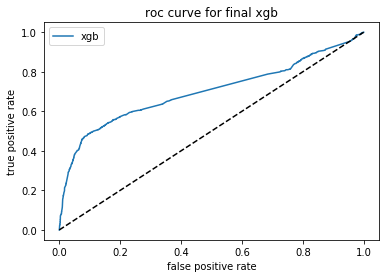

In [87]:
#plot the final roc curve
fpr,tpr,_=roc_curve(y_test_f, gs.predict_proba(X_test_f)[:,-1])
#fpr:false positive rates; tpr:true positive rates
fig,axis=plt.subplots()
axis.plot(fpr,tpr)
axis.plot([0, 1],[0, 1],'k--')
axis.set_xlabel('false positive rate')
axis.set_ylabel('true positive rate')
axis.legend(['xgb'])
plt.title('roc curve for final xgb')
plt.show()

In [89]:
#the end